Data PreProcessing

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the data files

In [0]:
dftrain = pd.read_csv('Train.csv')
dftest = pd.read_csv('Test.csv')
dfriders = pd.read_csv('Riders.csv')


**Deleting unnecessary columns**

Assumption made that the placement and comfirmation columns have nothing to do with estimating delivery time.




In [0]:
#Dropping unnecessary columns which will not help us predict
del dftrain['Placement - Day of Month']
del dftrain['Placement - Weekday (Mo = 1)']
del dftrain['Placement - Time']
del dftrain['Confirmation - Weekday (Mo = 1)']
del dftrain['Confirmation - Day of Month']
del dftrain['Confirmation - Time']

Assumption is that the arrival day of month and weekday are the same as the placement,confirmation and pickup. So we can delete those columns relating to the arrival day of month and weekday

In [0]:
del dftrain['Arrival at Destination - Weekday (Mo = 1)']
del dftrain['Arrival at Destination - Day of Month']
del dftrain['Arrival at Destination - Time']

The vehicles column, only 1 unique value, is it worth keeping? No relationship found, therefore delete.

In [5]:
#Looking for unique values
dftrain['Vehicle Type'].unique()

array(['Bike'], dtype=object)

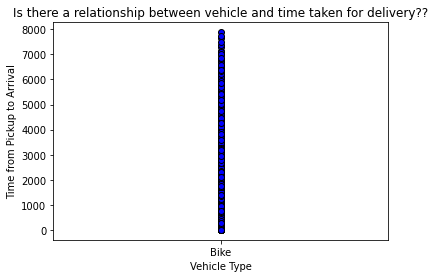

In [6]:
#Plotting graph to investigate the relationship
plt.scatter(x=dftrain['Vehicle Type'],y=dftrain['Time from Pickup to Arrival'],color='blue',edgecolor='k')
plt.xlabel('Vehicle Type')
plt.ylabel('Time from Pickup to Arrival')

plt.title('Is there a relationship between vehicle and time taken for delivery??')

plt.show()

In [0]:
del dftrain['Vehicle Type']

In [8]:
dfriders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


Merging the Riders table with the Train and Test so that we can use the average ratings columns

In [0]:
dftrain= dftrain.merge(dfriders,how='left', on='Rider Id')

In [0]:
dftest = dftest.merge(dfriders, how= 'left', on='Rider Id')

dropping the excess columns from the riders which have now been integrated with the train and test

In [0]:
#deleting the train columns
del dftrain['Rider Id']
del dftrain['Age']
del dftrain['No_of_Ratings']
del dftrain['No_Of_Orders']
#deleting the test columns
del dftest['Rider Id']
del dftest['Age']
del dftest['No_of_Ratings']
del dftest['No_Of_Orders']

In [0]:
del dftrain['Arrival at Pickup - Time']

In [0]:
del dftrain['Arrival at Pickup - Day of Month']

In [0]:
del dftrain['Arrival at Pickup - Weekday (Mo = 1)']

In [0]:
del dftrain['Order No']

In [0]:
del dftrain['User Id']

Not sure what to do with these two columns

In [0]:
del dftrain['Precipitation in millimeters']

In [0]:
del dftrain['Temperature']

Dropping all the test columns so that they are the same as the train columns

In [0]:
del dftest['Placement - Day of Month']
del dftest['Vehicle Type']
del dftest['Confirmation - Day of Month']
del dftest['Arrival at Pickup - Time']
del dftest['Confirmation - Weekday (Mo = 1)']
del dftest['Placement - Time']
del dftest['Placement - Weekday (Mo = 1)']
del dftest['Arrival at Pickup - Day of Month']
del dftest['User Id']
del dftest['Precipitation in millimeters']
del dftest['Temperature']
del dftest['Confirmation - Time']

Encoding the various columns

In [0]:
#encoding the business and personal column
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
dftrain['Personal or Business'] =le1.fit_transform(dftrain['Personal or Business'])

In [0]:
#encoding the business and personal column
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
dftest['Personal or Business'] =le1.fit_transform(dftest['Personal or Business'])

Struggled with the Platform type encoding

In [0]:
#encoding the platform type for dftrain
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#dftrain =  pd.DataFrame((ct.fit_transform(dftrain)))

In [0]:
#Encoding the platform type for dftest
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#dftest = (ct.fit_transform(dftest))

**Changing the Time to seconds**

In [0]:
dftrain['Delivery Time Taken'] = dftrain['Pickup - Time'].apply(lambda x: 12*3600 if x[-2:] == 'PM' and x[:-9] !='12' else 0 )

In [0]:
dftrain['Pickup - Time'] = dftrain['Pickup - Time'].apply(lambda x: (3600* int(x[:-9]) + 60 * int(x[-8:-6]) + int(x[-5:-4]))+(12*3600 if x[-2:] == 'PM' and x[:-9] !='12' else 0 ))

In [0]:
dftest['Delivery Time Taken'] = dftest['Pickup - Time'].apply(lambda x: 12*3600 if x[-2:] == 'PM' and x[:-9] !='12' else 0 )

In [0]:
dftest['Pickup - Time'] = dftest['Pickup - Time'].apply(lambda x: (3600* int(x[:-9]) + 60 * int(x[-8:-6]) + int(x[-5:-4]))+(12*3600 if x[-2:] == 'PM' and x[:-9] !='12' else 0 ))

In [28]:
#Making sure that the test and train columns are the same except for the response column
list(set(list(dftrain.columns)) - set(list(dftest.columns)))

['Time from Pickup to Arrival']

In [29]:
np.any(np.isnan(dftrain)) #check for nulls

False

In [30]:
np.all(np.isfinite(dftrain)) #check if infinite

True

**Fitting the Regression Model**

In [0]:
from sklearn.linear_model import LinearRegression

X = dftrain.drop(['Time from Pickup to Arrival'], axis=1)
Y = dftrain['Time from Pickup to Arrival']

In [0]:
lm = LinearRegression()

In [0]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [0]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [35]:
# train model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#extract model intercepts
beta_0 = float(lm.intercept_)
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [37]:
print("Intercept:", beta_0)

Intercept: 46103.68801989856


In [38]:
beta_js

,Coefficient
Platform Type,21.997471
Personal or Business,59.354448
Pickup - Day of Month,-0.992364
Pickup - Weekday (Mo = 1),6.470743
Pickup - Time,0.003403
Distance (KM),102.739603
Pickup Lat,614.242209
Pickup Long,-1077.797865
Destination Lat,-467.258582
Destination Long,-144.682498


In [0]:
#fig, axs = plt.subplots(2, 2, figsize=(9,7))

# axs[0,0].scatter(dftrain['Distance (KM)'], dftrain['Time from Pickup to Arrival'])
# axs[0,0].plot(dftrain['Distance (KM)'], lm.intercept_ + lm.coef_[1]*dftrain['Time from Pickup to Arrival'], color='red')
# axs[0,0].title.set_text('Distance (KM) vs. Time taken for delivery')

# axs[0,1].scatter(dftrain['Pickup - Time'], dftrain['Time from Pickup to Arrival'])
# axs[0,1].plot(dftrain['Pickup - Time'], lm.intercept_ + lm.coef_[3]*dftrain['Pickup - Time'], color='red')
# axs[0,1].title.set_text('Pickup - Time vs. Time taken for delivery')

# axs[1,0].scatter(dftrain['Personal or Business'], dftrain['Time from Pickup to Arrival'])
# axs[1,0].plot(dftrain['Personal or Business'], lm.intercept_ + lm.coef_[58]*dftrain['Personal or Business'], color='red')
# axs[1,0].title.set_text('Personal or Business vs. Time taken for delivery')

# axs[1,1].scatter(dftrain['Platform Type'], dftrain['Time from Pickup to Arrival'])
# axs[1,1].plot(dftrain['Platform Type'], lm.intercept_ + lm.coef_[21]*dftrain['Platform Type'], color='red')
# axs[1,1].title.set_text('Platform Type vs. Time taken for delivery')

# fig.tight_layout(pad=3.0)

# plt.show()

In [40]:
# get predictions on the test set
from sklearn.metrics import mean_squared_error 
y_pred = lm.predict(X_test)

# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 626308.5861477559


**Asessing model accuracy**

In [0]:
from sklearn import metrics
import math

In [0]:
results_dict = {'Training MSE':
                    {
                        
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [0]:
results_df = pd.DataFrame(data=results_dict)

In [44]:
results_df

,Training MSE,Test MSE,Test RMSE
MLR,644613.958683,626308.586148,791.396605


In [45]:
#zindi
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
dftest.head()

In [0]:
dftrain.head()

In [0]:
output = lm.predict(dftest.set_index('Order No'))

**Zindi submission**

In [0]:
Submission = pd.concat([dftest['Order No'],pd.DataFrame(output,columns=['Time from Pickup to Arrival'])],axis=1)

In [0]:
Submission.head()

In [0]:
Submission.to_csv('rough attempt.csv',index=False)